In [1]:
import sympy as sym
import numpy as np
from sympy.polys.monomials import itermonomials
from sympy.functions.combinatorial.factorials import binomial

sym.init_printing()

In [2]:
a_1_1, a_1_2, a_1_3, a_2_2, a_2_3, a_3_3 = sym.symbols('a_1_1, a_1_2, a_1_3, a_2_2, a_2_3, a_3_3')
b_1_1, b_1_2, b_1_3, b_2_2, b_2_3, b_3_3 = sym.symbols('b_1_1, b_1_2, b_1_3, b_2_2, b_2_3, b_3_3')
c_1, c_2, c_3 = sym.symbols('c_1, c_2, c_3')
x, y, z = sym.symbols("x, y, z")

In [3]:
variables = [x, y, z]
variables

In [4]:
f_1 = sym.lambdify((x, y, z), a_1_1 * x ** 2 + a_1_2 * x * y + a_1_3 * x * z \
                   + a_2_2 * y ** 2 + a_2_3 * y * z + a_3_3 * z ** 2)

In [5]:
f_2 = sym.lambdify((x, y, z), b_1_1 * x ** 2 + b_1_2 * x * y + b_1_3 * x * z \
                   + b_2_2 * y ** 2 + b_2_3 * y * z + b_3_3 * z ** 2)

In [6]:
f_3 = sym.lambdify((x, y, z), c_1 * x + c_2 * y + c_3 * z) 

In [101]:
class Macaulay():
    """
    A class for calculating the Macaulay resultant.
    """
    def __init__(self, polynomials, variables):
        """
        Parameters
        ----------          
        n: integer
            Number of variables and polynomials.
        variables: list
            A list of all n variables
        polynomials : list of sympy polynomials
            A list of n ndegree popynomials
        degrees: list
            A list of max degree of each polynomial
        degree_m: integer
            The degree_m (as referenced in literature)
        mononomials_size: integer
            The size of the set containg all the possible monomials of our variables of degree d_m
        """
        self.polynomials = polynomials
        self.variables = variables
        self.n = len(variables)
        self.degrees = [self.get_polynomial_degree(poly) for poly in self.polynomials]
        self.degree_m = self.get_degree_m()
        self.mononomials_size = self.get_size()
    
    def get_polynomial_degree(self, poly):
        return sym.Poly(poly(*variables)).degree()
    
    def get_degree_m(self):
        return 1 + sum([d - 1 for d in self.degrees])
    
    def get_size(self):
        return binomial(self.degree_m + self.n - 1, self.n - 1)
    
    def get_monomials_of_certain_degree(self, degree):
        return list(itermonomials(self.variables, degree) - 
                     itermonomials(self.variables, degree - 1))
        
    def get_monomials_set(self):
        monomials = self.get_monomials_of_certain_degree(self.degree_m)
        return monomials
    
    def get_row_coefficients(self):
        row_coeff = []
        divisable = []
        for i in range(self.n):
            if i == 0:
                row_coeff.append(self.get_monomials_of_certain_degree(self.degree_m - self.degrees[i]))
            
            else:
                divisable.append(self.variables[i - 1] ** self.degrees[i - 1])
                poss_rows = self.get_monomials_of_certain_degree(self.degree_m - self.degrees[i])
                for div in divisable:
                    for p in poss_rows:
                        if p % div == 0:
                            poss_rows.remove(p)
                row_coeff.append(poss_rows)   
        return row_coeff
    
    def get_matrix(self):
        rows = []
        row_coeff = self.get_row_coefficients()
        for i in range(self.n):
            for multiplier in row_coeff[i]:
                coeffs = []
                poly = sym.Poly(polynomials[i](*self.variables) * multiplier, *self.variables)
        
                for mono in monomial_set:
                    coeffs.append(poly.coeff_monomial(mono))
                rows.append(coeffs)
                
        return sym.Matrix(rows)
    
    def get_reduced_nonreduced(self):
        divisables = []
        for m in monomial_set:
            temp = []
            for i, v in enumerate(self.variables):
                temp.append(sym.Poly(m, v).degree() >= self.degrees[i])
            divisables.append(temp)
            
        reduced = [i for i, r in enumerate(divisables) if sum(r) < self.n - 1]
        non_reduced = [i for i, r in enumerate(divisables) if sum(r) >= self.n - 1]
        
        return reduced, non_reduced
    
    def get_submatrix(self, matrix):
        reduced, non_reduced = self.get_reduced_nonreduced()
        
        ais = list([self.polynomials[i](*self.variables).coeff(self.variables[i] ** self.degrees[i]) 
                    for i in range(self.n)])
        
        reduced_matrix = matrix[:, reduced]
        keep = []
        for row in range(reduced_matrix.rows):
            check = [ai in reduced_matrix[row, :] for ai in ais]
            if True not in check:
                keep.append(row)
                
        return matrix[keep, non_reduced]

In [102]:
polynomials = [f_1, f_2, f_3]
macaulay = Macaulay(polynomials, variables)

In [103]:
macaulay.get_row_coefficients()

In [104]:
macaulay.mononomials_size

In [105]:
monomial_set = macaulay.get_monomials_set()

In [106]:
monomial_set

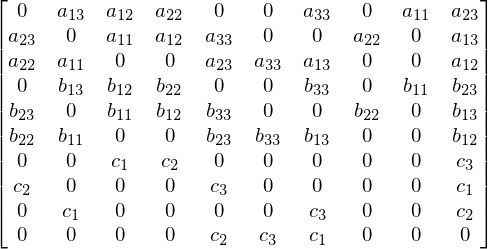

In [107]:
A = macaulay.get_matrix()
A

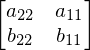

In [108]:
M = macaulay.get_submatrix(A)
M

In [109]:
M.det()

Examples
--------

In [110]:
x, y, z = sym.symbols("x, y, z")

p = sym.lambdify((x, y, z), x ** 2 + y - z)
q = sym.lambdify((x, y, z), x + y ** 2 - z)
h = sym.lambdify((x, y, z), 2 * x + 2 * y - z ** 2)
polynomials = [p, q, h]
variables = [x, y, z]

In [111]:
polynomials = [p, q, h]
macaulay = Macaulay(polynomials, [x, y, z])

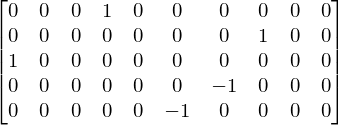

In [112]:
A = macaulay.get_matrix()
A

In [113]:
M = macaulay.get_submatrix(A)
M